In [1]:
from pyspark.sql import SparkSession
from IPython.display import Image
import importlib
import numpy as np

In [2]:
spark = SparkSession.builder.appName("Test").getOrCreate()

In [3]:
from modules.load import read_file
from modules.plots import catplot, countplot, distribution

In [4]:
df = read_file(spark, "data/transactions.ndjson")

Display all column names for reference

In [5]:
np.array(df.columns).reshape((13,3)).tolist()

[['accountNumber', 'accountOpenDate', 'acqCountry'],
 ['availableMoney', 'cardCVV', 'cardLast4Digits'],
 ['cardPresent', 'creditLimit', 'currentBalance'],
 ['currentExpDate', 'customerId', 'dateOfLastAddressChange'],
 ['enteredCVV', 'expirationDateKeyInMatch', 'isFraud'],
 ['merchantCategoryCode', 'merchantCountryCode', 'merchantName'],
 ['posConditionCode', 'posEntryMode', 'transactionAmount'],
 ['transactionDateTime', 'transactionType', 'creditLimitIndexed'],
 ['merchantNameIndexed', 'acqCountryIndexed', 'merchantCountryCodeIndexed'],
 ['posEntryModeIndexed',
  'posConditionCodeIndexed',
  'merchantCategoryCodeIndexed'],
 ['transactionTypeIndexed', 'creditLimitEncoded', 'merchantNameEncoded'],
 ['acqCountryEncoded', 'merchantCountryCodeEncoded', 'posEntryModeEncoded'],
 ['posConditionCodeEncoded',
  'merchantCategoryCodeEncoded',
  'transactionTypeEncoded']]

Look at the distribution of values of all the numerical columns

In [6]:
deicmal_cols = [col for col, dtype in df.dtypes if "decimal" in dtype]
for col in deicmal_cols:
    distribution(df.select(col), col)
    pass

Define the list of categorical columns and then plot them

In [6]:
categorical_cols = [
        "creditLimit",
        "merchantName",
        "acqCountry",
        "merchantCountryCode",
        "posEntryMode",
        "posConditionCode",
        "merchantCategoryCode",
        "transactionType"
    ]

In [8]:
for col in categorical_cols:
    countplot(df.select(col, "isFraud"), col, hue="isFraud")
    pass

Study the distributions grouped by fraud vs not fraud

In [9]:
deicmal_cols = [col for col, dtype in df.dtypes if ("decimal" in dtype) or ("double" in dtype)]
for col in deicmal_cols:
    catplot(df.select("isFraud", col), "isFraud", col, kind="strip")
    catplot(df.select("isFraud", col), "isFraud", col, kind="box")
    catplot(df.select("isFraud", col), "isFraud", col, kind="boxen")
    catplot(df.select("isFraud", col), "isFraud", col, kind="violin")

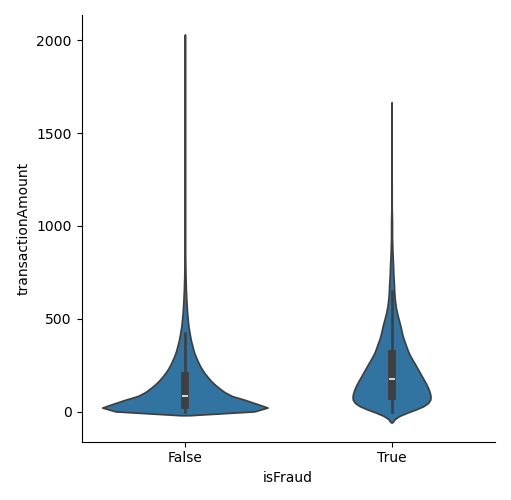

In [10]:
Image(filename="figures/transactionAmount_violinplot_by_isFraud.png")

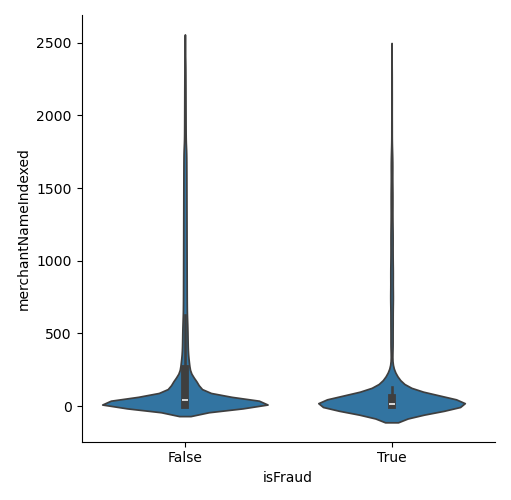

In [11]:
Image(filename="figures/merchantNameIndexed_violinplot_by_isFraud.png")

Look for patterns with secondary groupings on top of fraud vs not fraud

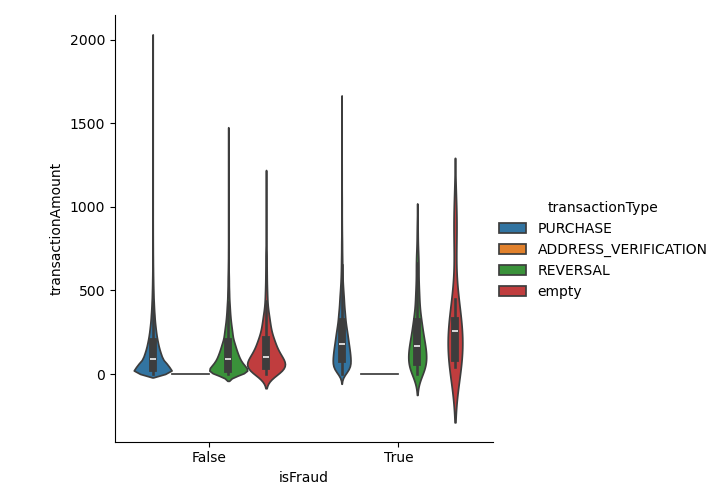

In [15]:
catplot(df.select("isFraud", "transactionAmount", "transactionType"), "isFraud", "transactionAmount", kind="violin", hue="transactionType")
Image(filename="figures/transactionAmount_violinplot_by_isFraud_with_transactionType.png")

Above plot shows that non-fraudulent transactions are concentrated very close to zero in all categories, while fraudulent charges are more spread out. This difference is especially notable for unmarked ("empty") transactions. The average size of the fraudulent transactions are consistently higher across all categories as a result.

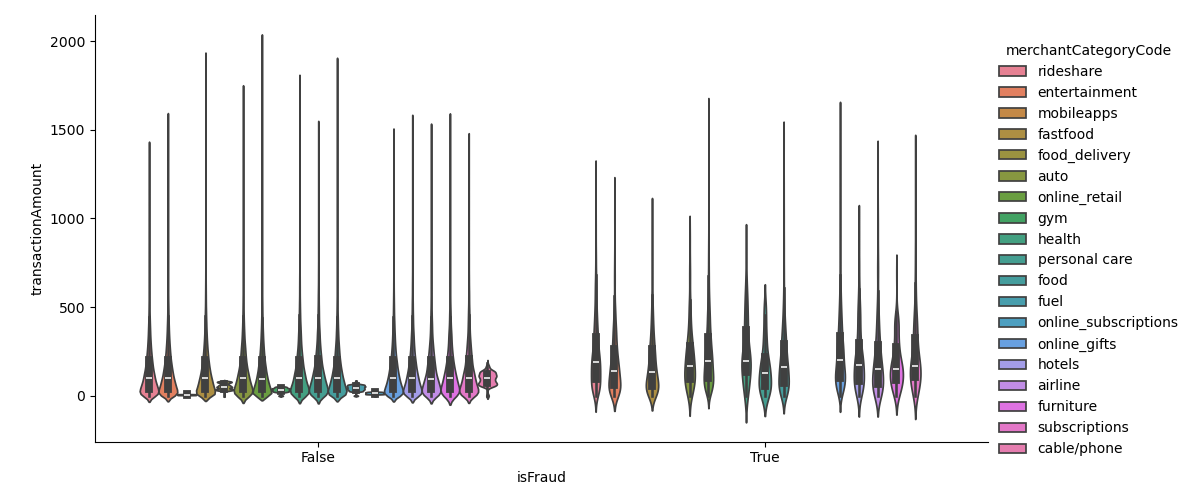

In [29]:
catplot(df.select("isFraud", "transactionAmount", "merchantCategoryCode"), "isFraud", "transactionAmount", kind="violin", hue="merchantCategoryCode", aspect=2)
Image(filename="figures/transactionAmount_violinplot_by_isFraud_with_merchantCategoryCode.png")

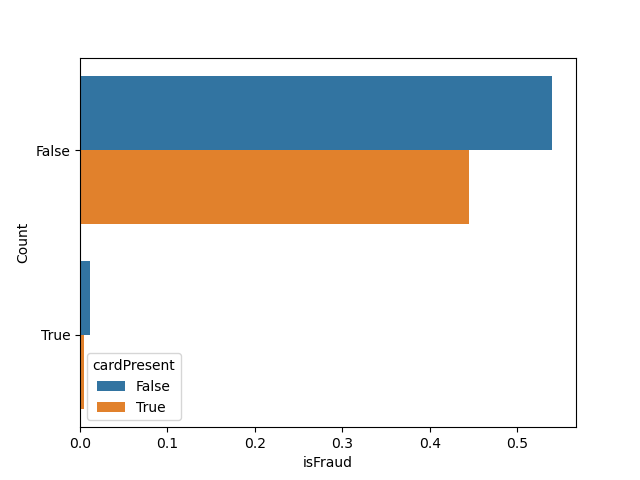

In [16]:
countplot(df.select("isFraud", "cardPresent"), "isFraud", hue="cardPresent", stat="proportion")
Image(filename="figures/isFraud_barchart_with_cardPresent.png")

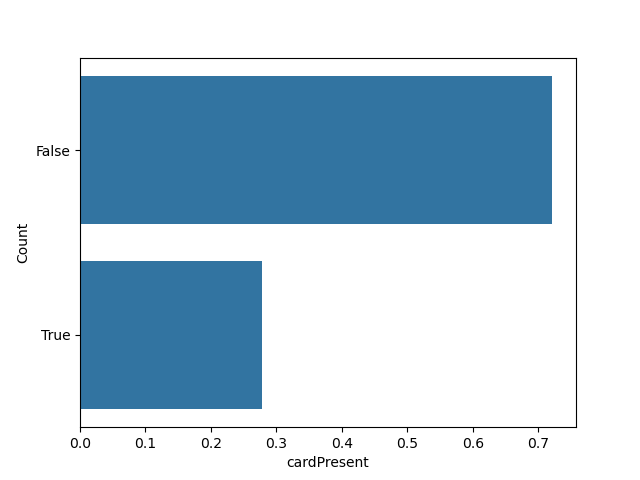

In [15]:
countplot(df.select("isFraud", "cardPresent").where(df.isFraud == True), "cardPresent", stat="proportion")
Image(filename="figures/cardPresent_barchart.png")

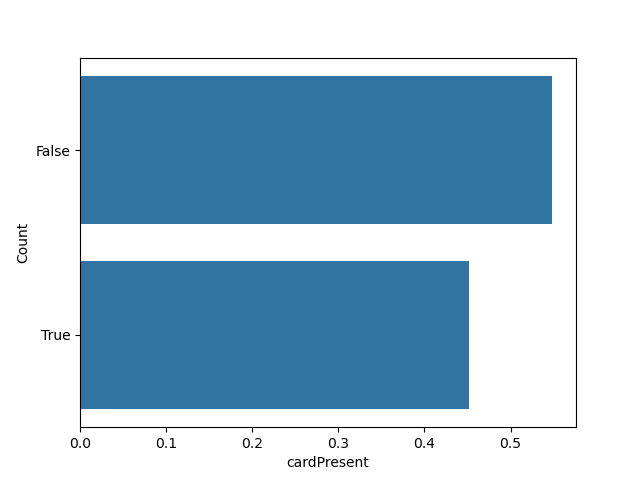

In [17]:
countplot(df.select("isFraud", "cardPresent").where(df.isFraud == False), "cardPresent", stat="proportion")
Image(filename="figures/cardPresent_barchart.png")

The two above plots show that while legitimate transactions have roughly equal likelihood of being performed with or without the card present, fraudulent transactions happend predominantly without the card present.